Table of contents:

[Repository and batch information](#repository-and-batch-information)

[Batch content overview](#batch-content-overview)

[Initial parameters of the simulation](#initial-parameters-of-the-simulation)
  - [Initial parameters overview](#initial-parameters-overview)
  - [Query json-object data](#query-json-object-data)

[Simulated data](#simulated-data)
  - [Topic overview](#topic-overview)
  - [Query json-array data](#query-json-array-data)
  - [Query and rename columns](#query-and-rename-columns)
  - [Data query constraints](#data-query-constraints)
  - [Sampling methods](#sampling-methods)
  - [Separate tables by sid](#separate-tables-by-sid)
  - [Maximum and minimum values](#maximum-and-minimum-values)
  - [Unique values](#unique-values)
  - [Number of unique values](#number-of-unique-values)

[Plots](#plots)
  - [Quick plots](#quick-plots)
    - [Quick x vs. y plot](#quick-x-vs-y-plot)
    - [Time plot](#time-plot)
    - [Plot with pandas](#plot-with-pandas)

  - [Advanced plots](#advanced-plots)
    - [x vs. y](#x-vs-y)
    - [3d plot](#3d-plot)
    - [Subplots with a shared x-axis](#subplots-with-a-shared-x-axis)
    - [Grid of plots](#grid-of-plots)
    - [Ellipse error plot](#ellipse-error-plot)


Download the data_access module, which allows you to retrieve general information about the repositories and batches, as well as query and visualize data:

In [55]:
from citros_data_analysis import data_access as da

Show the version of the package:

In [56]:
#show the version:
import citros_data_analysis
print(citros_data_analysis.__version__)

0.8.1


Create CitrosDB object to get access to the database. Repository is set automatically to the current repository

In [57]:
citros = da.CitrosDB()

Besides, both batch and repository can be set manually:

In [58]:
citros_gal = da.CitrosDB(repo = 'gal_orbits', batch = 'galactic orbits_4')

## Repository and batch information

Repository is set automatically to the current repository

Show all repositories that were created by me:

In [59]:
citros.search_repo(user='me').print()

{
 'gal_orbits': {
   'id': 'dc19961e-0efd-41e2-9f66-3d6ac2a45829',
   'description': '',
   'created_at': '2023-09-19T12:49:55.319598+00:00',
   'updated_at': '2023-09-19T12:49:55.319598+00:00',
   'git': None
 },
 'template': {
   'id': 'fb9b1b03-7943-4f3d-a815-8a923f7b0be4',
   'description': '',
   'created_at': '2023-10-24T16:11:45.752422+00:00',
   'updated_at': '2023-10-24T16:11:45.752422+00:00',
   'git': None
 }
}


Show information about all repositories with word 'orbits':

In [60]:
citros.search_repo('orbits').print()

{
 'gal_orbits': {
   'id': 'dc19961e-0efd-41e2-9f66-3d6ac2a45829',
   'description': '',
   'created_at': '2023-09-19T12:49:55.319598+00:00',
   'updated_at': '2023-09-19T12:49:55.319598+00:00',
   'git': None
 }
}


Show information about the repository with the exact name 'gal_orbits':

In [61]:
citros.search_repo('gal_orbits', exact_match = True).print()

{
 'gal_orbits': {
   'id': 'dc19961e-0efd-41e2-9f66-3d6ac2a45829',
   'description': '',
   'created_at': '2023-09-19T12:49:55.319598+00:00',
   'updated_at': '2023-09-19T12:49:55.319598+00:00',
   'git': None
 }
}


In the 'gal_orbits' repository, show the most recent batch I created:

In [62]:
citros.repo('gal_orbits').search_batch(-1, user = 'me').print()

{
 'orbits': {
   'id': '0a868a9c-b62f-4267-8682-6ad6d935dca2',
   'sid': [0],
   'created_at': '2023-10-23T09:34:51.91283+00:00',
   'updated_at': '2023-11-12T07:00:00.03209+00:00',
   'status': 'DONE',
   'data_status': 'UNLOADED',
   'data_last_access': '2023-11-05T07:07:39.438882+00:00',
   'tag': 'latest',
   'simulation': 'simulation_gal_orbits',
   'message': 'None',
   'parallelism': 2,
   'completions': 1,
   'cpu': 2,
   'gpu': 0,
   'memory': '265',
   'repo': 'gal_orbits',
   'link': 'https://citros.io/gal_orbits/data/runs/simulation_gal_orbits/orbits'
 }
}


Display a list of all batches that were created by me:

In [63]:
list(citros.search_batch(user='me').keys())

['orbits',
 'cluster orbit',
 'test_web_gal_orbits2',
 'test_gal_orb_2',
 'test_gal_orbit_web',
 'test_gal_orb',
 'galactic orbits_1',
 'galactic orbits',
 'galactic orbits_4']

Show information about all batches that have 'galactic orbits' in their names:

In [64]:
citros.search_batch('galactic orbits').print()

{
 'galactic orbits_1': {
   'id': '3c89af7d-3dee-48d2-9a19-8201c6030346',
   'sid': [0, 1, 2, 3, 4],
   'created_at': '2023-10-01T08:26:57.251743+00:00',
   'updated_at': '2023-11-12T07:30:03.210815+00:00',
   'status': 'DONE',
   'data_status': 'LOADED',
   'data_last_access': '2023-11-12T07:30:03.210815+00:00',
   'tag': 'latest',
   'simulation': 'simulation_gal_orbits',
   'message': 'return_next_val_func',
   'parallelism': 5,
   'completions': 5,
   'cpu': 2,
   'gpu': 0,
   'memory': '265',
   'repo': 'gal_orbits',
   'link': 'https://citros.io/gal_orbits/data/runs/simulation_gal_orbits/galactic%20orbits_1'
 },
 'galactic orbits': {
   'id': 'a6b21847-f44c-45ed-a03e-67bcc4966f7d',
   'sid': [0, 1, 2, 3, 4],
   'created_at': '2023-10-01T08:18:13.038195+00:00',
   'updated_at': '2023-11-12T07:00:00.03209+00:00',
   'status': 'DONE',
   'data_status': 'UNLOADED',
   'data_last_access': '2023-10-15T11:24:34.073909+00:00',
   'tag': 'latest',
   'simulation': 'simulation_gal_orbits'

Show information about the exact batch named 'galactic orbits':

In [65]:
citros.search_batch('galactic orbits', exact_match = True).print()

{
 'galactic orbits': {
   'id': 'a6b21847-f44c-45ed-a03e-67bcc4966f7d',
   'sid': [0, 1, 2, 3, 4],
   'created_at': '2023-10-01T08:18:13.038195+00:00',
   'updated_at': '2023-11-12T07:00:00.03209+00:00',
   'status': 'DONE',
   'data_status': 'UNLOADED',
   'data_last_access': '2023-10-15T11:24:34.073909+00:00',
   'tag': 'latest',
   'simulation': 'simulation_gal_orbits',
   'message': 'return_next_val_func',
   'parallelism': 5,
   'completions': 5,
   'cpu': 2,
   'gpu': 0,
   'memory': '265',
   'repo': 'gal_orbits',
   'link': 'https://citros.io/gal_orbits/data/runs/simulation_gal_orbits/galactic%20orbits'
 }
}


Look for the batches with 'test' in their names that were created in specific simulation - 'simulation_gal_orbits':

In [66]:
citros.simulation('simulation_gal_orbits').search_batch('test').print()

{
 'test_web_gal_orbits2': {
   'id': '92fbed68-0768-45d5-a6f3-f1e10b87a392',
   'sid': [0],
   'created_at': '2023-10-09T08:55:16.797441+00:00',
   'updated_at': '2023-11-12T07:00:00.03209+00:00',
   'status': 'DONE',
   'data_status': 'UNLOADED',
   'data_last_access': '2023-10-11T20:47:12.654912+00:00',
   'tag': 'latest',
   'simulation': 'simulation_gal_orbits',
   'message': '',
   'parallelism': 1,
   'completions': 1,
   'cpu': 2,
   'gpu': 0,
   'memory': '265',
   'repo': 'gal_orbits',
   'link': 'https://citros.io/gal_orbits/data/runs/simulation_gal_orbits/test_web_gal_orbits2'
 },
 'test_gal_orb_2': {
   'id': '21f0e8b7-64cb-4d57-baae-6d955f29ab12',
   'sid': [0],
   'created_at': '2023-10-09T08:41:39.064655+00:00',
   'updated_at': '2023-11-12T07:00:00.03209+00:00',
   'status': 'DONE',
   'data_status': 'UNLOADED',
   'data_last_access': '2023-10-19T06:36:54.297329+00:00',
   'tag': 'latest',
   'simulation': 'simulation_gal_orbits',
   'message': 'test from cli',
   'par

## Batch content overview

To get general information about the batch content, execute `info()` method. 

It returns dictionary, that contains:
   - 'size': size of the selected data
   - 'sid_count': number of sids
   - 'sid_list': list of the sids
   - 'topic_count': number of topics
   - 'topic_list': list of topics
   - 'message_count': number of messages

Show information about topics of the batch 'galactic orbits_1':

In [67]:
citros.batch('galactic orbits_1').info().print()

{
 'size': '839 kB',
 'sid_count': 5,
 'sid_list': [0, 1, 2, 3, 4],
 'topic_count': 2,
 'topic_list': ['/config', '/gal_orbits'],
 'message_count': 2121
}


The specific piece of information could be achived by the keywords.

For example, to get total number of messages:

In [68]:
num = citros.batch('galactic orbits_1').info()['message_count']
print(f'Total number of messages: {num}')

Total number of messages: 2121


## Initial parameters of the simulation

### Initial parameters overview

The '/config' topic contains information about the parameters of the simulation.

If topic is specified, method `info()` appends dictionary 'topics', that has the following structure:
  - 'topics':
     - str topic name:
        - 'type': type
        - 'data_structure': structure of the data
        - 'message_count': number of messages

To show information about the topic '/config':

In [69]:
citros.batch('galactic orbits_1').topic('/config').info().print()

{
 'size': '2640 bytes',
 'sid_count': 5,
 'sid_list': [0, 1, 2, 3, 4],
 'topic_count': 1,
 'topic_list': ['/config'],
 'message_count': 5,
 'topics': {
   '/config': {
     'type': ['/var/lib/citros/runs/simulation_gal_orbits/galactic orbits_1/0/config/gal_orbits.yaml', '/var/lib/citros/runs/simulation_gal_orbits/galactic orbits_1/1/config/gal_orbits.yaml', '/var/lib/citros/runs/simulation_gal_orbits/galactic orbits_1/2/config/gal_orbits.yaml', '/var/lib/citros/runs/simulation_gal_orbits/galactic orbits_1/3/config/gal_orbits.yaml', '/var/lib/citros/runs/simulation_gal_orbits/galactic orbits_1/4/config/gal_orbits.yaml'],
     'data_structure': {
       'data': {
         'gal_orbits': {
           'ros__parameters': {
             'rh': 'float',
             't0': 'float',
             'tf': 'float',
             'vr': 'float',
             'lat': 'float',
             'lon': 'float',
             'atol': 'float',
             'pmde': 'float',
             'pmra': 'float',
            

Under the key 'data_structure' the structure of the data is presented.

To show only the dictionary with structure and types of the parameters:

In [70]:
citros.batch('galactic orbits_1').topic('/config').info()['topics']['/config']['data_structure'].print()

{
 'data': {
   'gal_orbits': {
     'ros__parameters': {
       'rh': 'float',
       't0': 'float',
       'tf': 'float',
       'vr': 'float',
       'lat': 'float',
       'lon': 'float',
       'atol': 'float',
       'pmde': 'float',
       'pmra': 'float',
       'rtol': 'float',
       'M_sph': 'float',
       'M_disc': 'float',
       'reverse': 'str',
       'publish_freq': 'float'
     }
   }
 }
}


### Query json-object data

As it can be seen from the previous output, parameters are stored in dictionary under the key 'ros__parameters'.

To retrieve them as a pandas.DataFrame, where each row corresponds to the simulation's sid:

In [71]:
citros.batch('galactic orbits_1').topic('/config').data('data.gal_orbits.ros__parameters')

,sid,rid,time,topic,type,data.gal_orbits.ros__parameters
0,0,0,0,/config,/var/lib/citros/runs/simulation_gal_orbits/gal...,"{'rh': 11.5, 't0': 0.0, 'tf': 20.0, 'vr': 0.71..."
1,1,0,0,/config,/var/lib/citros/runs/simulation_gal_orbits/gal...,"{'rh': 11.5, 't0': 0.0, 'tf': 20.0, 'vr': 0.71..."
2,2,0,0,/config,/var/lib/citros/runs/simulation_gal_orbits/gal...,"{'rh': 11.5, 't0': 0.0, 'tf': 20.0, 'vr': 0.71..."
3,3,0,0,/config,/var/lib/citros/runs/simulation_gal_orbits/gal...,"{'rh': 11.5, 't0': 0.0, 'tf': 20.0, 'vr': 0.71..."
4,4,0,0,/config,/var/lib/citros/runs/simulation_gal_orbits/gal...,"{'rh': 11.5, 't0': 0.0, 'tf': 20.0, 'vr': 0.71..."


Query values of the specific parameter, for example 'M_disc':

In [72]:
citros.batch('galactic orbits_1').topic('/config').data('data.gal_orbits.ros__parameters.M_disc')

,sid,rid,time,topic,type,data.gal_orbits.ros__parameters.M_disc
0,0,0,0,/config,/var/lib/citros/runs/simulation_gal_orbits/gal...,95.0
1,1,0,0,/config,/var/lib/citros/runs/simulation_gal_orbits/gal...,97.5
2,2,0,0,/config,/var/lib/citros/runs/simulation_gal_orbits/gal...,100.0
3,3,0,0,/config,/var/lib/citros/runs/simulation_gal_orbits/gal...,102.5
4,4,0,0,/config,/var/lib/citros/runs/simulation_gal_orbits/gal...,105.0


Or query for several parameter, for example 'M_disc' and 'M_sph':

In [73]:
citros.batch('galactic orbits_1').topic('/config').data(['data.gal_orbits.ros__parameters.M_disc','data.gal_orbits.ros__parameters.M_sph'])

,sid,rid,time,topic,type,data.gal_orbits.ros__parameters.M_disc,data.gal_orbits.ros__parameters.M_sph
0,0,0,0,/config,/var/lib/citros/runs/simulation_gal_orbits/gal...,95.0,30.0
1,1,0,0,/config,/var/lib/citros/runs/simulation_gal_orbits/gal...,97.5,30.0
2,2,0,0,/config,/var/lib/citros/runs/simulation_gal_orbits/gal...,100.0,30.0
3,3,0,0,/config,/var/lib/citros/runs/simulation_gal_orbits/gal...,102.5,30.0
4,4,0,0,/config,/var/lib/citros/runs/simulation_gal_orbits/gal...,105.0,30.0


Get parameters for the simulation sid = 2:

In [74]:
citros.batch('galactic orbits_1').topic('/config').sid(2).data('data.gal_orbits.ros__parameters')

,sid,rid,time,topic,type,data.gal_orbits.ros__parameters
0,2,0,0,/config,/var/lib/citros/runs/simulation_gal_orbits/gal...,"{'rh': 11.5, 't0': 0.0, 'tf': 20.0, 'vr': 0.71..."


If the method `data()` is called without parameters, all dictionary items are automatically divided by separate columns:

In [75]:
citros.batch('galactic orbits_1').topic('/config').data()

,sid,rid,time,topic,type,data.gal_orbits.ros__parameters.rh,data.gal_orbits.ros__parameters.t0,data.gal_orbits.ros__parameters.tf,data.gal_orbits.ros__parameters.vr,data.gal_orbits.ros__parameters.lat,data.gal_orbits.ros__parameters.lon,data.gal_orbits.ros__parameters.atol,data.gal_orbits.ros__parameters.pmde,data.gal_orbits.ros__parameters.pmra,data.gal_orbits.ros__parameters.rtol,data.gal_orbits.ros__parameters.M_sph,data.gal_orbits.ros__parameters.M_disc,data.gal_orbits.ros__parameters.reverse,data.gal_orbits.ros__parameters.publish_freq
0,0,0,0,/config,/var/lib/citros/runs/simulation_gal_orbits/gal...,11.5,0.0,20.0,0.715,5.76,357.18,1.000000e-08,-3.7,-4.52,1.000000e-08,30.0,95.0,False,10.0
1,1,0,0,/config,/var/lib/citros/runs/simulation_gal_orbits/gal...,11.5,0.0,20.0,0.715,5.76,357.18,1.000000e-08,-3.7,-4.52,1.000000e-08,30.0,97.5,False,10.0
2,2,0,0,/config,/var/lib/citros/runs/simulation_gal_orbits/gal...,11.5,0.0,20.0,0.715,5.76,357.18,1.000000e-08,-3.7,-4.52,1.000000e-08,30.0,100.0,False,10.0
3,3,0,0,/config,/var/lib/citros/runs/simulation_gal_orbits/gal...,11.5,0.0,20.0,0.715,5.76,357.18,1.000000e-08,-3.7,-4.52,1.000000e-08,30.0,102.5,False,10.0
4,4,0,0,/config,/var/lib/citros/runs/simulation_gal_orbits/gal...,11.5,0.0,20.0,0.715,5.76,357.18,1.000000e-08,-3.7,-4.52,1.000000e-08,30.0,105.0,False,10.0


## Simulated data

### Topic overview

Show information about the topic '/gal_orbits':

In [76]:
citros.batch('galactic orbits_1').topic('/gal_orbits').info().print()

{
 'size': '837 kB',
 'sid_count': 5,
 'sid_list': [0, 1, 2, 3, 4],
 'topic_count': 1,
 'topic_list': ['/gal_orbits'],
 'message_count': 2116,
 'topics': {
   '/gal_orbits': {
     'type': 'std_msgs/msg/Float64MultiArray',
     'data_structure': {
       'data': {
         'data': 'list',
         '__msgtype__': 'str'
       }
     },
     'message_count': 2116
   }
 }
}


If specific sid is set, the dictionary 'sids' is also appended in the output, with the following structure:
  - 'sids':
     - int sid value:
        - 'topics': 
           - str topic name:
              - 'message_count': number of messages
              - 'start_time': time when simulation started
              - 'end_time': time when simulation ended
              - 'duration': duration of the simalation process
              - 'frequency': frequency of the simulation process

In [77]:
citros.batch('galactic orbits_1').topic('/gal_orbits').sid([1, 2]).info().print()

{
 'size': '331 kB',
 'sid_count': 2,
 'sid_list': [1, 2],
 'topic_count': 1,
 'topic_list': ['/gal_orbits'],
 'message_count': 837,
 'sids': {
   1: {
     'topics': {
       '/gal_orbits': {
         'message_count': 417,
         'start_time': 1696148857421013864,
         'end_time': 1696148899021009846,
         'duration': 41599995982,
         'frequency': 10.024
       }
     }
   },
   2: {
     'topics': {
       '/gal_orbits': {
         'message_count': 420,
         'start_time': 1696148857325398431,
         'end_time': 1696148899225451243,
         'duration': 41900052812,
         'frequency': 10.024
       }
     }
   }
 },
 'topics': {
   '/gal_orbits': {
     'type': 'std_msgs/msg/Float64MultiArray',
     'data_structure': {
       'data': {
         'data': 'list',
         '__msgtype__': 'str'
       }
     },
     'message_count': 837
   }
 }
}


To get number of messages for topic for each of the sids 1 and 2:

In [78]:
inf = citros.batch('galactic orbits_1').topic('/gal_orbits').sid([1, 2]).info()
num_1 = inf['sids'][1]['topics']['/gal_orbits']['message_count']
num_2 = inf['sids'][2]['topics']['/gal_orbits']['message_count']

print(f'Number of messages in "/gal_orbits" for sid = 1: {num_1}, for sid = 2: {num_2}\n')

Number of messages in "/gal_orbits" for sid = 1: 417, for sid = 2: 420



To get structure of the topic and total number of messages for this topic:

In [79]:
inf_dyn = citros.batch('galactic orbits_1').topic('/gal_orbits').info()
num = inf_dyn['message_count']

print('Total number of messages in topic: {}'.format(num))
print('topic structure:')
inf_dyn['topics']['/gal_orbits']['data_structure'].print()

Total number of messages in topic: 2116
topic structure:
{
 'data': {
   'data': 'list',
   '__msgtype__': 'str'
 }
}


Print the table with data structure for the topic '/gal_orbits':

In [80]:
citros.batch('galactic orbits_1').topic('/gal_orbits').get_data_structure()

+-------------+--------------------------------+--------------------+
|       topic |                           type | data               |
+-------------+--------------------------------+--------------------+
| /gal_orbits | std_msgs/msg/Float64MultiArray | {                  |
|             |                                |   data: list,      |
|             |                                |   __msgtype__: str |
|             |                                | }                  |
+-------------+--------------------------------+--------------------+


### Query json-array data

Data in '/gal_orbits' topic is stired as a json array, that correspond to python list.
Data may be queried by `data()` method. The output depends on the passed to `data()` parameters. See the difference in the following examples:

Get all data from json 'data' column calling `data()` without parameters.

This way all json-objects will be divided by column. As in 'data' column we have only one json-object under the key 'data' with nested json-array, 
the output will be column 'data.data' with lists in each row.

In [81]:
print(citros.batch('galactic orbits_1').topic('/gal_orbits').data().head(5))
# Method head(n) shows first n rows of the pandas.DataFrame.

   sid  rid                 time        topic                            type  \
0    0    0  1696148856301534862  /gal_orbits  std_msgs/msg/Float64MultiArray   
1    0    1  1696148856401467749  /gal_orbits  std_msgs/msg/Float64MultiArray   
2    0    2  1696148856501479403  /gal_orbits  std_msgs/msg/Float64MultiArray   
3    0    3  1696148856601395552  /gal_orbits  std_msgs/msg/Float64MultiArray   
4    0    4  1696148856701462832  /gal_orbits  std_msgs/msg/Float64MultiArray   

                                           data.data  \
0  [0.0, 3.178328834701186, 0.6746471153544727, -...   
1  [0.00968456763819105, 3.18479386101937, 0.6604...   
2  [0.07360082071745605, 3.2240590732207703, 0.56...   
3  [0.15923227109067076, 3.2676176735458733, 0.44...   
4  [0.26920814560409767, 3.3088709901294084, 0.30...   

                 data.__msgtype__  
0  std_msgs/msg/Float64MultiArray  
1  std_msgs/msg/Float64MultiArray  
2  std_msgs/msg/Float64MultiArray  
3  std_msgs/msg/Float64MultiArra

Get all data as a dictionary in a one column (download 'data' column as it is in database):

In [82]:
print(citros.batch('galactic orbits_1').topic('/gal_orbits').data('data').head(5))

   sid  rid                 time        topic                            type  \
0    0    0  1696148856301534862  /gal_orbits  std_msgs/msg/Float64MultiArray   
1    0    1  1696148856401467749  /gal_orbits  std_msgs/msg/Float64MultiArray   
2    0    2  1696148856501479403  /gal_orbits  std_msgs/msg/Float64MultiArray   
3    0    3  1696148856601395552  /gal_orbits  std_msgs/msg/Float64MultiArray   
4    0    4  1696148856701462832  /gal_orbits  std_msgs/msg/Float64MultiArray   

                                                data  
0  {'data': [0.0, 3.178328834701186, 0.6746471153...  
1  {'data': [0.00968456763819105, 3.1847938610193...  
2  {'data': [0.07360082071745605, 3.2240590732207...  
3  {'data': [0.15923227109067076, 3.2676176735458...  
4  {'data': [0.26920814560409767, 3.3088709901294...  


Explicitly query content under the key 'data':

In [83]:
print(citros.batch('galactic orbits_1').topic('/gal_orbits').data('data.data').head())

   sid  rid                 time        topic                            type  \
0    0    0  1696148856301534862  /gal_orbits  std_msgs/msg/Float64MultiArray   
1    0    1  1696148856401467749  /gal_orbits  std_msgs/msg/Float64MultiArray   
2    0    2  1696148856501479403  /gal_orbits  std_msgs/msg/Float64MultiArray   
3    0    3  1696148856601395552  /gal_orbits  std_msgs/msg/Float64MultiArray   
4    0    4  1696148856701462832  /gal_orbits  std_msgs/msg/Float64MultiArray   

                                           data.data  
0  [0.0, 3.178328834701186, 0.6746471153544727, -...  
1  [0.00968456763819105, 3.18479386101937, 0.6604...  
2  [0.07360082071745605, 3.2240590732207703, 0.56...  
3  [0.15923227109067076, 3.2676176735458733, 0.44...  
4  [0.26920814560409767, 3.3088709901294084, 0.30...  


Get the first element of the 'data' list:

In [84]:
print(citros.batch('galactic orbits_1').topic('/gal_orbits').data('data.data[0]'))

      sid  rid                 time        topic  \
0       0    0  1696148856301534862  /gal_orbits   
1       0    1  1696148856401467749  /gal_orbits   
2       0    2  1696148856501479403  /gal_orbits   
3       0    3  1696148856601395552  /gal_orbits   
4       0    4  1696148856701462832  /gal_orbits   
...   ...  ...                  ...          ...   
2111    4  423  1696148966811011847  /gal_orbits   
2112    4  424  1696148966911112524  /gal_orbits   
2113    4  425  1696148967011166535  /gal_orbits   
2114    4  426  1696148967111085665  /gal_orbits   
2115    4  427  1696148967211169273  /gal_orbits   

                                type  data.data[0]  
0     std_msgs/msg/Float64MultiArray      0.000000  
1     std_msgs/msg/Float64MultiArray      0.009685  
2     std_msgs/msg/Float64MultiArray      0.073601  
3     std_msgs/msg/Float64MultiArray      0.159232  
4     std_msgs/msg/Float64MultiArray      0.269208  
...                              ...           ...  
2111

Get the first and second elements of the 'data' list:

In [85]:
print(citros.batch('galactic orbits_1').topic('/gal_orbits').data(['data.data[0]', 'data.data[1]']))

      sid  rid                 time        topic  \
0       0    0  1696148856301534862  /gal_orbits   
1       0    1  1696148856401467749  /gal_orbits   
2       0    2  1696148856501479403  /gal_orbits   
3       0    3  1696148856601395552  /gal_orbits   
4       0    4  1696148856701462832  /gal_orbits   
...   ...  ...                  ...          ...   
2111    4  423  1696148966811011847  /gal_orbits   
2112    4  424  1696148966911112524  /gal_orbits   
2113    4  425  1696148967011166535  /gal_orbits   
2114    4  426  1696148967111085665  /gal_orbits   
2115    4  427  1696148967211169273  /gal_orbits   

                                type  data.data[0]  data.data[1]  
0     std_msgs/msg/Float64MultiArray      0.000000      3.178329  
1     std_msgs/msg/Float64MultiArray      0.009685      3.184794  
2     std_msgs/msg/Float64MultiArray      0.073601      3.224059  
3     std_msgs/msg/Float64MultiArray      0.159232      3.267618  
4     std_msgs/msg/Float64MultiArray    

### Query and rename columns

Let's query data and divide content of the list of the 'data' column by separate columns and rename them according to the names 
of the variable that listed in Readme.md:

In [86]:
column_names = ['t', 'R', 'Vr', 'fi', 'Vfi', 'z', 'Vz', 'E', 'C', 'xg', 'yg']
query = ['data.data['+str(i)+']' for i in range(len(column_names))]

F = citros.batch('galactic orbits_1').topic('/gal_orbits').data(query)
F.rename({query[i]: column_names[i] for i in range(len(query))}, axis = 1, inplace = True)

print(F)

      sid  rid                 time        topic  \
0       0    0  1696148856301534862  /gal_orbits   
1       0    1  1696148856401467749  /gal_orbits   
2       0    2  1696148856501479403  /gal_orbits   
3       0    3  1696148856601395552  /gal_orbits   
4       0    4  1696148856701462832  /gal_orbits   
...   ...  ...                  ...          ...   
2111    4  423  1696148966811011847  /gal_orbits   
2112    4  424  1696148966911112524  /gal_orbits   
2113    4  425  1696148967011166535  /gal_orbits   
2114    4  426  1696148967111085665  /gal_orbits   
2115    4  427  1696148967211169273  /gal_orbits   

                                type          t         R        Vr  \
0     std_msgs/msg/Float64MultiArray   0.000000  3.178329  0.674647   
1     std_msgs/msg/Float64MultiArray   0.009685  3.184794  0.660483   
2     std_msgs/msg/Float64MultiArray   0.073601  3.224059  0.568613   
3     std_msgs/msg/Float64MultiArray   0.159232  3.267618  0.449421   
4     std_msgs/msg/F

### Data query constraints

To apply constraints on sid, rid and time, functions sid(), rid() and time() may be used.

- sid()\
To query data for specific simulation run ids, pass them in a list to sid().\
For example for sid = 1 or 2: sid([1,2])\
or specify `start`, `end`/`count` parameters:\
For example for 3 <= sid <= 7: sid(start = 3, end = 7)

- rid()\
To set specific rid, pass them in a list:\
For example for rid = 1, 2, 3: sid([1,2,3])\
To set range of rids, specify `start`, `end`/`count`:\
For 5 <= rid <= 10: rid(start = 5, end = 10) or rid(start = 5, count = 6)

- time()\
To get range of time, set `start`, `end`/`duration` for time (in nanoseconds).\
For 10 <= time <= 20: time(start = 10, end = 20)\
or set `duration` to exclude the end point: 10s <= time < 20s: time(start = 10, duration = 10)\

- set_filter()\
To set constraints on json-data column, `set_filter()` method is used.\
Constraints are provided as dictionary {key_1: value_1, key_2: value_2, ...}, where:\
key_n - must match labels of the columns,\
value_n:
  - in the case of equality: list of exact values, like set_filter({'data.x': [1,2]})\
  - in the case of inequality: dictionary with key '>', '>=', '<' & '<=', like set_filter({'data.x': {'gte': 5}})\

- set_order()\
By default, the results are ordered by 'sid' and 'rid' in ascending order.
To apply sorting of the result in ascending order pass label(s) of the column as a str (list of str)\
set_order(['rid', 'time'])\
To specify ascending or descending way of ordering, provide dictionary {'column_label': order}, where 'column_label' is a label of the column and 'order' is 'asc' for ascending order and 'desc' for descending order.\
For example, to sort by 'rid' in ascending order and by 'sid' in descending:\
set_order('rid': 'asc', 'sid': 'desc')

To get columns 'data.data[0]', 'data.data[1]' with sid = 1 or 2, with 128 <= rid <= 180 and time >= 5ns, 
where data.data[1] > 1 and sort the result in descending order by the column 'rid':

In [87]:
citros.batch('galactic orbits_1').topic('/gal_orbits')\
      .sid([1,2]).rid(start = 128, end = 180).time(start = 5)\
      .set_filter({'data.data[1]': {'>': 1}})\
      .set_order({'rid': 'desc'})\
      .data(['data.data[0]', 'data.data[1]'])

,sid,rid,time,topic,type,data.data[0],data.data[1]
0,1,180,1696148875421086641,/gal_orbits,std_msgs/msg/Float64MultiArray,8.813584,3.124762
1,2,180,1696148875325370553,/gal_orbits,std_msgs/msg/Float64MultiArray,8.658863,3.186399
2,2,179,1696148875225434339,/gal_orbits,std_msgs/msg/Float64MultiArray,8.562063,3.254705
3,1,179,1696148875321130624,/gal_orbits,std_msgs/msg/Float64MultiArray,8.705128,3.216838
4,2,178,1696148875125350867,/gal_orbits,std_msgs/msg/Float64MultiArray,8.438117,3.320458
...,...,...,...,...,...,...,...
66,2,147,1696148872025308379,/gal_orbits,std_msgs/msg/Float64MultiArray,6.578114,1.075672
67,1,147,1696148872121113902,/gal_orbits,std_msgs/msg/Float64MultiArray,6.670449,1.215857
68,2,146,1696148871925306441,/gal_orbits,std_msgs/msg/Float64MultiArray,6.554327,1.000472
69,1,146,1696148872021033042,/gal_orbits,std_msgs/msg/Float64MultiArray,6.642558,1.127392


### Sampling methods

If the amount of data is too large, sampling functions `skip()`, `avg()` and `move_avg()` may be applied.

`skip(n)` is used to select every nth message.

Limits on sid, rid and time (set by sid(), rid() and time()) are applyied before selection, 
while limits on json-data column, set by set_filter() are applied after selection.

Selection for each sid is performed separately.

The code below select each 10th messages (pandas.DataFRame method `head()` is used to show first 5 rows of the output):

In [88]:
citros.batch('galactic orbits_1').topic('/gal_orbits').skip(10).data().head(5)

,sid,rid,time,topic,type,data.data,data.__msgtype__
0,0,0,1696148856301534862,/gal_orbits,std_msgs/msg/Float64MultiArray,"[0.0, 3.178328834701186, 0.6746471153544727, -...",std_msgs/msg/Float64MultiArray
1,0,10,1696148857301459819,/gal_orbits,std_msgs/msg/Float64MultiArray,"[1.0493514041161789, 3.159866609440456, -0.677...",std_msgs/msg/Float64MultiArray
2,0,20,1696148858301546000,/gal_orbits,std_msgs/msg/Float64MultiArray,"[2.076113172418186, 1.6848434118747104, -2.421...",std_msgs/msg/Float64MultiArray
3,0,30,1696148859301448353,/gal_orbits,std_msgs/msg/Float64MultiArray,"[2.380763267680914, 0.8096715727336836, -3.157...",std_msgs/msg/Float64MultiArray
4,0,40,1696148860301691446,/gal_orbits,std_msgs/msg/Float64MultiArray,"[2.5155943634264606, 0.47181693600751645, -1.0...",std_msgs/msg/Float64MultiArray


Instead of just skipping messages, each n messages may be everaged by `avg(n)`.

Limits on sid, rid and time (set by sid(), rid() and time()) are applyied before averaging, 
while limits on json-data column, set by set_filter() are applied after averaging.

Averaging for each sid is performed separately.

The value of 'rid' for each everaged range is set as a minimum value among the averaged rid values.

Only numeric values may be averaged and the labels of the json-data columns with numeric content should be explicitly listed in data([]).

To everage each 10 messages (pandas.DataFRame method `head()` is used to show first 5 rows of the output):

In [89]:
citros.batch('galactic orbits_1').topic('/gal_orbits').avg(10).data(['data.data[0]']).head(5)

,sid,rid,time,topic,type,data.data[0]
0,0,0,1.696149e+18,/gal_orbits,std_msgs/msg/Float64MultiArray,0.376891
1,0,10,1.696149e+18,/gal_orbits,std_msgs/msg/Float64MultiArray,1.593826
2,0,20,1.696149e+18,/gal_orbits,std_msgs/msg/Float64MultiArray,2.223698
3,0,30,1.696149e+18,/gal_orbits,std_msgs/msg/Float64MultiArray,2.455574
4,0,40,1.696149e+18,/gal_orbits,std_msgs/msg/Float64MultiArray,2.542829


Use move_avg(n, m) to apply moving average over n messages and select each m-th row of the result.

Limits on sid, rid and time are applyied before averaging and selection,
while limits on json-data column, set by set_filter() are applied after averaging.

Averaging and selection for each sid is performed separately.

The value of 'rid' for each everaged range is set as a minimum value among the averaged rid values.

Only numeric values may be averaged and the labels of the json-data columns with numeric content 
should be explicitly listed in data([]).

To average each 10 messages and select every second row of the result (pandas.DataFRame method `head()` is used to show first 5 rows of the output):

In [90]:
citros.batch('galactic orbits_1').topic('/gal_orbits').move_avg(10,2).data(['data.data[0]']).head(5)

,sid,rid,time,topic,type,data.data[0]
0,0,0,1.696149e+18,/gal_orbits,std_msgs/msg/Float64MultiArray,0.376891
1,0,2,1.696149e+18,/gal_orbits,std_msgs/msg/Float64MultiArray,0.599431
2,0,4,1.696149e+18,/gal_orbits,std_msgs/msg/Float64MultiArray,0.854671
3,0,6,1.696149e+18,/gal_orbits,std_msgs/msg/Float64MultiArray,1.117358
4,0,8,1.696149e+18,/gal_orbits,std_msgs/msg/Float64MultiArray,1.367136


### Separate tables by sid

Get tables with different sid separetly by `get_sid_tables()` method
the returning dictionary contains sid as dictionary keys and tables as dictionary values.

[Constraints](#data-query-constraints) and such [sampling methods](#sampling-methods) as skipping, averaging and calculation of moving average may be applied too.

Let's query 'data.data[0]' and 'data.data[1]' columns with the following requairements:\
sid equals 1, 2 or 3\
11 <= rid <= 1000\ 
the output is averaged over 10 rows\
only rows with "data.data[1]" >= 1 are selected\
the result is ordered by 'rid' in descending order

In [91]:
dfs = citros.batch('galactic orbits_1').topic('/gal_orbits')\
            .sid([1, 2, 3])\
            .rid(start = 11, end = 1000)\
            .avg(10)\
            .set_filter({"data.data[1]": {'>=': 1}})\
            .set_order({'rid':'desc'})\
            .get_sid_tables(data_query = ['data.data[0]', 'data.data[1]'])

#Let's print the table with sid = 1
print('sid values are: {}\n'.format(list(dfs.keys())))
print('table with sid = 1:')
print(dfs[1].head(5))

sid values are: [1, 2, 3]

table with sid = 1:
   sid  rid          time        topic                            type  \
0    1  411  1.696149e+18  /gal_orbits  std_msgs/msg/Float64MultiArray   
1    1  401  1.696149e+18  /gal_orbits  std_msgs/msg/Float64MultiArray   
2    1  391  1.696149e+18  /gal_orbits  std_msgs/msg/Float64MultiArray   
3    1  381  1.696149e+18  /gal_orbits  std_msgs/msg/Float64MultiArray   
4    1  371  1.696149e+18  /gal_orbits  std_msgs/msg/Float64MultiArray   

   data.data[0]  data.data[1]  
0     19.828755      1.707432  
1     19.136923      2.044663  
2     18.211345      2.033948  
3     17.676312      1.623775  
4     17.346089      1.102675  


### Maximum and minimum values

Find maximum and minimum values of the simulation ids (sid):

In [92]:
column_name = 'sid'

result_max = citros.batch('galactic orbits_1').topic('/gal_orbits').get_max_value(column_name)
result_min = citros.batch('galactic orbits_1').topic('/gal_orbits').get_min_value(column_name)

print(f"max value of the column '{column_name}' : {result_max}")
print(f"min value of the column '{column_name}' : {result_min}")

max value of the column 'sid' : 4
min value of the column 'sid' : 0


Find maximum and minimum values of the parameter 'R' that is stored at 'data.data[1]' for the simulation with sid = 3:

In [93]:
column_name = 'data.data[1]'

result_max = citros.batch('galactic orbits_1').topic('/gal_orbits').sid(3).get_max_value(column_name)
result_min = citros.batch('galactic orbits_1').topic('/gal_orbits').sid(3).get_min_value(column_name)

print(f"for sid = 3 max value of the column '{column_name}' : {result_max}")
print(f"for sid = 3 min value of the column '{column_name}' : {result_min}")

for sid = 3 max value of the column 'data.data[1]' : 3.469803504109693
for sid = 3 min value of the column 'data.data[1]' : 0.4566526918207721


Find maximum value of the parameter 'R', corresponding to this maximum time ('data.data[0]') and simulation ('sid'). 
Also determine the initial mass of the disk M_disk when the maximum is achieved.

In [94]:
#set return_index = True to get the sid and rid of the max/min value
#if there are several pairs of sid and rid values that correspond to the same max/min value, the sid and rid are returned as lists
R_max, sid_max, rid_max = citros.batch('galactic orbits_1').topic('/gal_orbits').get_max_value('data.data[0]', return_index = True)

#At this step, both sid_max and rid_max are either lists or integers.
#To simplify and unify the code for both cases, we'll first determine if sid_max is an integer (indicating that R_max was reached in just one simulation).
#If that's the case, we'll convert both sid_max and rid_max into lists:
if isinstance(sid_max, int):
    sid_max = [sid_max]
    rid_max = [rid_max]

#get the 'data.data[0]' value that correspods to sid_max and rid_max:

time = []
for s, r in zip(sid_max, rid_max):
    time.append(citros.batch('galactic orbits_1').topic('/gal_orbits').sid(s).rid(r).data('data.data[0]')['data.data[0]'].iloc[0])

#get the M_disk parameter that corresponds to the sid_max:
init_mass = []
for s in sid_max:
    init_mass.append(citros.batch('galactic orbits_1').topic('/config').sid(s).data(['data.gal_orbits.ros__parameters.M_disc'])['data.gal_orbits.ros__parameters.M_disc'].iloc[0])

print(f"maximum R value = {R_max},\nmaximum is reached at:")

for i in range(len(sid_max)):
    print(f"sid = {sid_max[i]} (M_disk = {init_mass[i]}), time = {time[i]}")

maximum R value = 20.0,
maximum is reached at:
sid = 4 (M_disk = 105.0), time = 20.0
sid = 3 (M_disk = 102.5), time = 20.0
sid = 2 (M_disk = 100.0), time = 20.0
sid = 1 (M_disk = 97.5), time = 20.0
sid = 0 (M_disk = 95.0), time = 20.0


### Unique values

Print unique values by `get_unique_values()`, for example get all possible topics for the batch:

In [95]:
column_names = ['topic']
result = citros.batch('galactic orbits_1').get_unique_values(column_names)

#print the result
print(result)

['/gal_orbits', '/config']


To get unique combination of values, specify list of the columns in "column_names".
For example, to get unique combination of topic-type:

In [96]:
column_names = ['topic', 'type']
result = citros.batch('galactic orbits_1').get_unique_values(column_names)

#print the result
from prettytable import PrettyTable
table = PrettyTable(field_names=column_names, align='r')
table.add_rows(result)
print(table)

+-------------+---------------------------------------------------------------------------------------+
|       topic |                                                                                  type |
+-------------+---------------------------------------------------------------------------------------+
|     /config | /var/lib/citros/runs/simulation_gal_orbits/galactic orbits_1/4/config/gal_orbits.yaml |
|     /config | /var/lib/citros/runs/simulation_gal_orbits/galactic orbits_1/2/config/gal_orbits.yaml |
|     /config | /var/lib/citros/runs/simulation_gal_orbits/galactic orbits_1/0/config/gal_orbits.yaml |
|     /config | /var/lib/citros/runs/simulation_gal_orbits/galactic orbits_1/3/config/gal_orbits.yaml |
| /gal_orbits |                                                        std_msgs/msg/Float64MultiArray |
|     /config | /var/lib/citros/runs/simulation_gal_orbits/galactic orbits_1/1/config/gal_orbits.yaml |
+-------------+-------------------------------------------------

### Number of unique values

Print number of the unique values in the column "column_name"

In [97]:
#name of the column:
column_name = 'type'

counts = citros.batch('galactic orbits_1').topic('/gal_orbits').sid([1]) .get_unique_counts(column_name)
print(f"number of unique values in column '{column_name}' for topic '/gal_orbits': {counts[0][0]}")

#you may group the result, for example by topics:
group_by = 'topic'
counts = citros.batch('galactic orbits_1').sid([1]) .get_unique_counts(column_name, group_by = group_by)

print(f"number of unique values in column '{column_name}':")
table = PrettyTable(field_names= [group_by, 'unique_counts'], align='r')
table.add_rows(counts)
table.border = False
print(table)

number of unique values in column 'type' for topic '/gal_orbits': 1
number of unique values in column 'type':
       topic  unique_counts 
     /config              1 
 /gal_orbits              1 


## Plots

### Quick plots

May be used to take a quick look on data without saving it.

#### Quick x vs. y plot

Plot 'data.data[0]' vs. 'data.data[1]' for sids = 1 and 2:

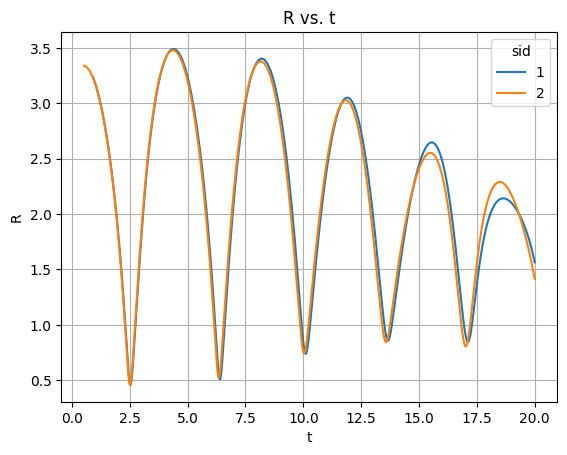

In [98]:
#import matplotlib
import matplotlib.pyplot as plt

#create a figure to plot on
fig, ax = plt.subplots()

citros.batch('galactic orbits_1').topic('/gal_orbits').sid([1,2]).\
       xy_plot(ax, var_x_name = 'data.data[0]',var_y_name = 'data.data[1]',
               x_label = 't', y_label = 'R', title_text = 'R vs. t')
#do not specify `sid` if you would like to plot for all simulations

#### Time plot

Sometimes 'rid' may represent the time scale, for example if the results of the simulation is recorded with the step `time_step`. 

Let's imagine that in topic '/gal_orbits' simulations were recorded each 0.5 units of times. Then the plot 'data.data[1]' vs. time may be plotted in the following way:

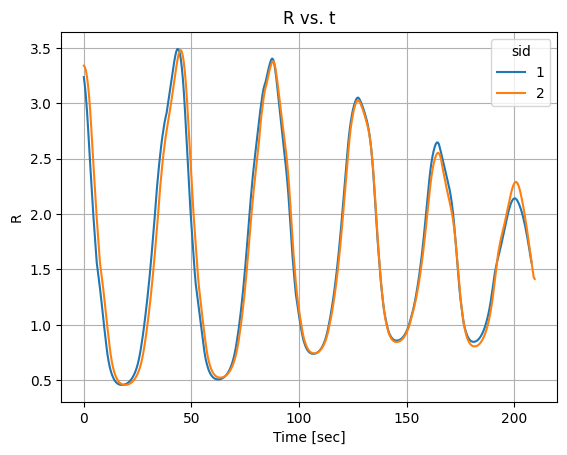

In [99]:
#import matplotlib
import matplotlib.pyplot as plt

#create a figure to plot on
fig, ax = plt.subplots()

citros.batch('galactic orbits_1').topic('/gal_orbits').sid([1,2]).\
       time_plot(ax, var_name = 'data.data[1]', time_step = 0.5, y_label = 'R', title_text = 'R vs. t')

#### Plot with pandas

pandas methods of plotting may be used too. To make separate plot for each simulation id, for example 'data.data[0]' vs. 'rid':

<Axes: xlabel='rid'>

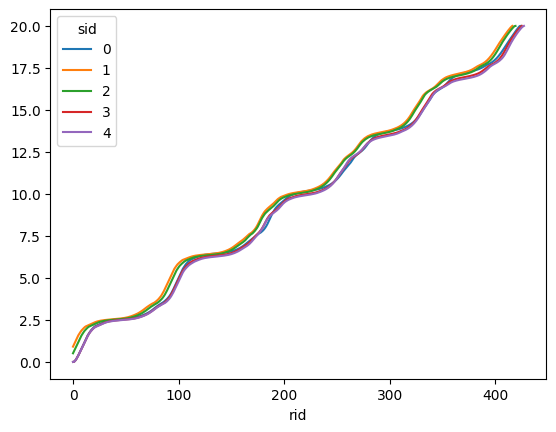

In [100]:
citros.batch('galactic orbits_1').topic('/gal_orbits').data(['data.data[0]'])\
      .set_index(['rid','sid']).unstack()['data.data[0]'].plot()

Or plot several columns 'data.data[0]', 'data.data[1]' vs. 'rid'

<Axes: xlabel='rid'>

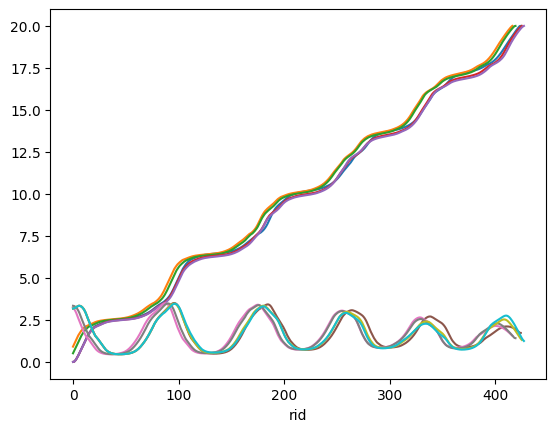

In [101]:
citros.batch('galactic orbits_1').topic('/gal_orbits').data(['data.data[0]', 'data.data[1]'])\
      .set_index(['rid','sid']).unstack()[['data.data[0]', 'data.data[1]']].plot(legend = False)

### Advanced plots

Let's use DataFrame that we quieried and save under the name *F* [previously](#query-and-rename-columns)

In all the following methods the matplotlib.Figure and matplotlib.Axes are returned, that may be used for further plotting

#### x vs. y

Plot simple graph 'R' vs 't' for different sid:

/home/ros/.local/lib/python3.10/site-packages/citros_data_analysis/data_access/_plotter.py:103: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


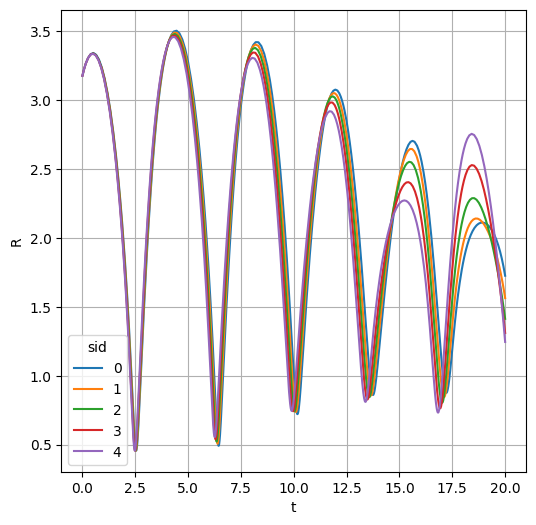

In [102]:
fig, ax = citros.plot_graph(F, 't', 'R', '-')

#### 3d plot

Plot x vs. y vs. z

/home/ros/.local/lib/python3.10/site-packages/citros_data_analysis/data_access/_plotter.py:213: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_1353/1554365917.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


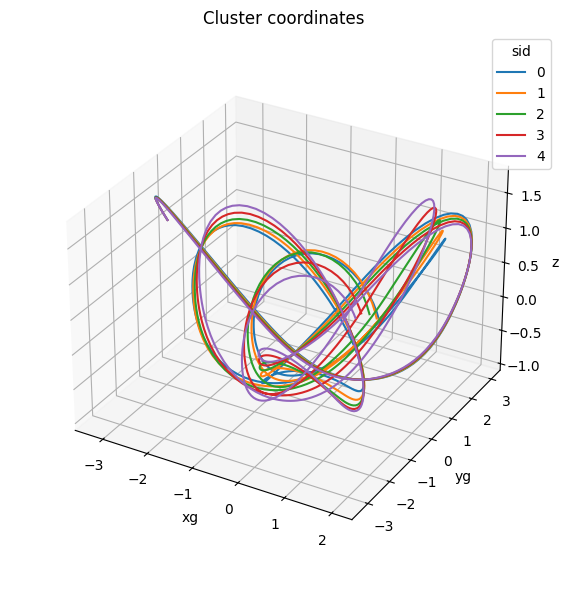

In [103]:
# parameter 'scale' = True will set the same ranges for all axis

fig, ax = citros.plot_3dgraph(F, "xg", "yg", "z", '-', 
                                scale = False, title = 'Cluster coordinates', legend = True)

ax.set_box_aspect(aspect=None, zoom=0.9)
fig.tight_layout()
fig.show()

#### Subplots with a shared x-axis

Plot 'xg' vs 't' and 'yg' vs. 't' on adjacent panels on one figure:

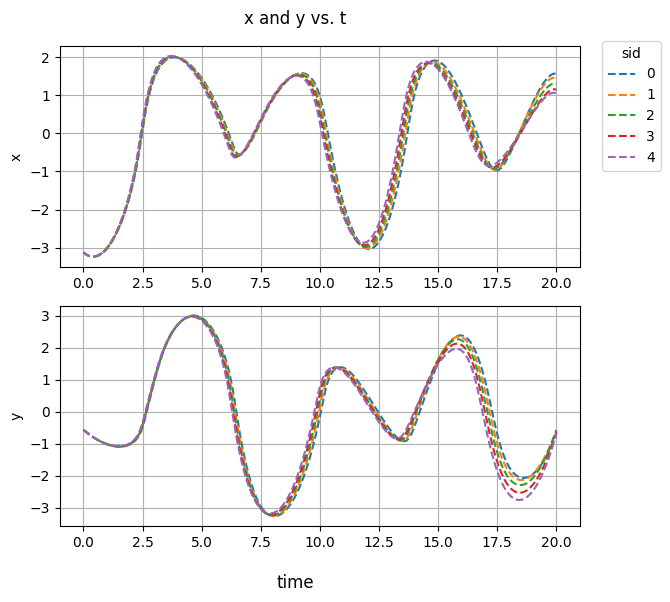

In [104]:
fig, ax = citros.multiple_y_plot(F, "t", ["xg", "yg"], '--', legend = True, title = 'x and y vs. t', set_x_label = 'time', set_y_label = ['x','y'])

#### Grid of plots 

Plot a matrix of 3 x 3 graphs, each displaying either the histogram with values distribution (for graphs on the diagonal) or the relationship between variables 'xg', 'yg' and 'z':

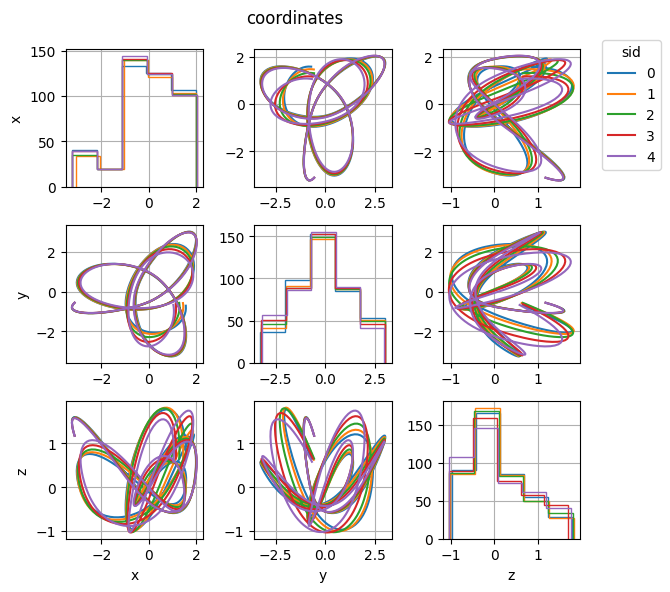

In [105]:
# parameter 'scale' = True set the same ranges for all axis

fig, ax = citros.multiplot(F, ["xg", "yg", "z"], '-' , 
                           legend = True, title = 'coordinates', scale = False, set_x_label = ['x', 'y', 'z' ],
                           set_y_label = ['x', 'y', 'z' ])

#### Ellipse error plot

Plot error ellipse for the values of "xg" (data.data[9]) and "yg" (data.data[10]) columns that corresponds to the last rid in each sid:

sid numbers: [0, 1, 3, 2, 4]
rid last numbers: {0: 424, 1: 416, 3: 425, 2: 419, 4: 427}


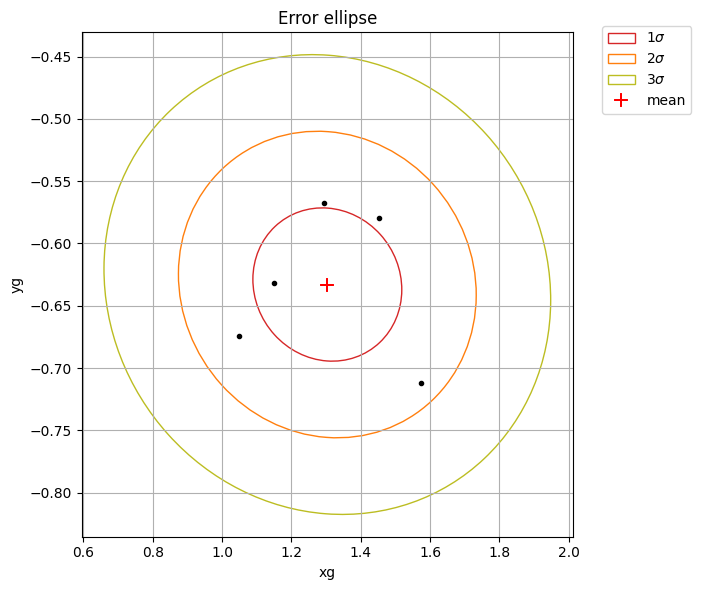

In [106]:
#get all possible sid:
sid_list = citros.batch('galactic orbits_1').topic('/gal_orbits').get_unique_values('sid')
print(f"sid numbers: {sid_list}")

#for each sid get the last rid:
rid_dict = {}
for s in sid_list:
    rid_dict[s] = citros.batch('galactic orbits_1').topic('/gal_orbits').sid(s).get_max_value('rid')
print(f"rid last numbers: {rid_dict}")

# get the values of "xg" (data.data[9]) and "yg" (data.data[10]), that corresponds to the last rid:
# we are creating an empty DataFrame 'df', query for the values of the exact sid and rid and add the result to the 'df'.

import pandas as pd
df = pd.DataFrame()

for s, r in rid_dict.items():
    df = pd.concat([df, citros.batch('galactic orbits_1').topic('/gal_orbits').sid(s).rid(r).data(['data.data[9]', 'data.data[10]'])])

df.rename({'data.data[9]': 'xg', 'data.data[10]': 'yg'}, axis = 1, inplace = True)

fig, ax = citros.plot_sigma_ellipse(df, x_label = 'xg', y_label = 'yg', 

                                    n_std = [1,2,3], plot_origin=False, bounding_error=False,

                                    set_x_label='xg', set_y_label = 'yg', title = 'Error ellipse')

Get ellipse parameters by setting `return_ellipse_param` to True. If multiple ellipses are depicted, a list of their parameters is returned. If `bounding_error` is also set to True, the bounding error radius is added to the returned parameters.

ellipse parameters:
center: 1.3036536322913725, -0.6329708998713189
width: 1.2882322314491699, height: 0.3681599130759066
angle: -1.2000672572888407

radius of the error circle: 2.0545712928193334



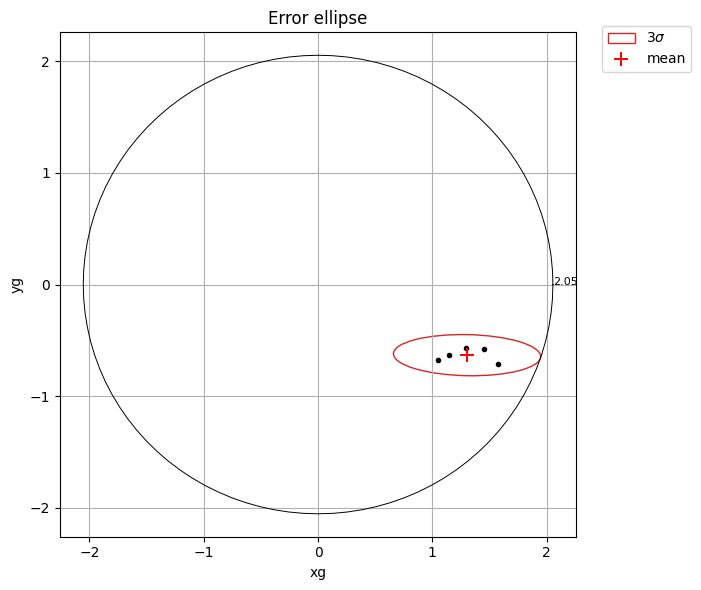

In [107]:
bounding_error = True
fig, ax, ellipse_param = citros.plot_sigma_ellipse(df, x_label = 'xg', y_label = 'yg', 
                                    n_std = 3, plot_origin=False, bounding_error=bounding_error,
                                    set_x_label='xg', set_y_label = 'yg', title = 'Error ellipse',
                                    return_ellipse_param = True)

print("ellipse parameters:")
print(f"center: {ellipse_param['x']}, {ellipse_param['y']}")
print(f"width: {ellipse_param['width']}, height: {ellipse_param['height']}")
print(f"angle: {ellipse_param['alpha']}\n")
if bounding_error:
        print(f"radius of the error circle: {ellipse_param['bounding_error']}\n")

Add references to the all batches that were used in the current notebook:

In [108]:
ref = da.Ref()
ref.print()

REFERENCES:

yalyalieva lidia, lidia@lulav.space
galactic orbits_1, 'return_next_val_func', 2023-10-01 08:26:57
https://citros.io/gal_orbits/batch/3c89af7d-3dee-48d2-9a19-8201c6030346/

